<a href="https://colab.research.google.com/github/jyothi-sk/ML_adventure/blob/main/ML_project_Bike__Sharing_Demand_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - Bike Sharing Demand Prediction



##### **Project Type**    - Regression
##### **Contribution**    - Individual

# **Project Summary -**

A bicycle-sharing system is a shared transport service where bicycles are available for shared use by individuals at low cost. Most large-scale urban bike sharing programmes have numerous bike check-out stations, and operate much like public transit systems, catering to tourists and visitors as well as local residents.

People use bike-share for various reasons. Cost and time are primary motivators for using bike-sharing programs, in particular the perceived cost of travel and time saved traveling. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time.



# **GitHub Link -**

# **Problem Statement**


The purpose of this project is to understand and predict the rented bikes count every hour for the stable supply of rental bikes.
We can check the count of rental bikes per hour considering the seasons, temperature, and other climate parameters that are recorded and available in this dataset.

# **Let's Begin !**

**Importing Libraries**

In [76]:
# importing numpy and pandas
import numpy as np
import pandas as pd

# Importing Visualization Libraries
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
import missingno as msno

#importing preprocessing libraries
from scipy import stats
from scipy.special import boxcox1p
from statsmodels.stats import weightstats as stests
from scipy.stats import f_oneway
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, PolynomialFeatures, PowerTransformer, StandardScaler

# Import model selection and Gridsearch cv & Randomsearch cv for hyperparameter tuning
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import train_test_split

# Importing Models
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor

# import evalution metrics
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from sklearn.pipeline import Pipeline


#ignore warnings
import warnings
warnings.filterwarnings("ignore")

In [77]:
# install lime
!pip install lime

# import for model explainibility
import lime
from lime import lime_tabular

**Dataset Loading**

In [78]:
# Load Dataset
from google.colab import drive
drive.mount("/content/drive/")

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [79]:
df = pd.read_csv('/content/drive/MyDrive/Almabetter/Modules/Module4_ML/SeoulBikeData.csv', encoding= 'ISO-8859-1')

**Dataset First View**

In [80]:
# Dataset First Look
df.head()


Date  Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  \
0  01/12/2017                254     0             -5.2           37   
1  01/12/2017                204     1             -5.5           38   
2  01/12/2017                173     2             -6.0           39   
3  01/12/2017                107     3             -6.2           40   
4  01/12/2017                 78     4             -6.0           36   

   Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
0               2.2              2000                      -17.6   
1               0.8              2000                      -17.6   
2               1.0              2000                      -17.7   
3               0.9              2000                      -17.6   
4               2.3              2000                      -18.6   

   Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm) Seasons     Holiday  \
0                      0.0           0.0            0.0  Winter  No Holiday   
1                      0.0           0.0            0.0  Winter  No Holiday   
2                      0.0           0.0            0.0  Winter  No Holiday   
3                      0.0           0.0            0.0  Winter  No Holiday   
4                      0.0           0.0            0.0  Winter  No Holiday   

  Functioning Day  
0             Yes  
1             Yes  
2             Yes  
3             Yes  
4             Yes

In [81]:
df.tail()

Date  Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  \
8755  30/11/2018               1003    19              4.2           34   
8756  30/11/2018                764    20              3.4           37   
8757  30/11/2018                694    21              2.6           39   
8758  30/11/2018                712    22              2.1           41   
8759  30/11/2018                584    23              1.9           43   

      Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
8755               2.6              1894                      -10.3   
8756               2.3              2000                       -9.9   
8757               0.3              1968                       -9.9   
8758               1.0              1859                       -9.8   
8759               1.3              1909                       -9.3   

      Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm) Seasons  \
8755                      0.0           0.0            0.0  Autumn   
8756                      0.0           0.0            0.0  Autumn   
8757                      0.0           0.0            0.0  Autumn   
8758                      0.0           0.0            0.0  Autumn   
8759                      0.0           0.0            0.0  Autumn   

         Holiday Functioning Day  
8755  No Holiday             Yes  
8756  No Holiday             Yes  
8757  No Holiday             Yes  
8758  No Holiday             Yes  
8759  No Holiday             Yes

In [82]:
# Dataset Rows & Columns count
print(f"Number of rows: {df.shape[0]}\nNumber of columns: {df.shape[1]}")

Number of rows: 8760
Number of columns: 14


In [83]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

From above information we can observe that there are 10 numerical features and 4 categorical features. The 'Hour' should be categorical but is in numeric form due to its values in numeric.

In [84]:
# Dataset Duplicate Value Count
df.duplicated().value_counts()

False    8760
dtype: int64

In [85]:
# Missing Values/Null Values Count
df.isna().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

<Figure size 1000x600 with 0 Axes>

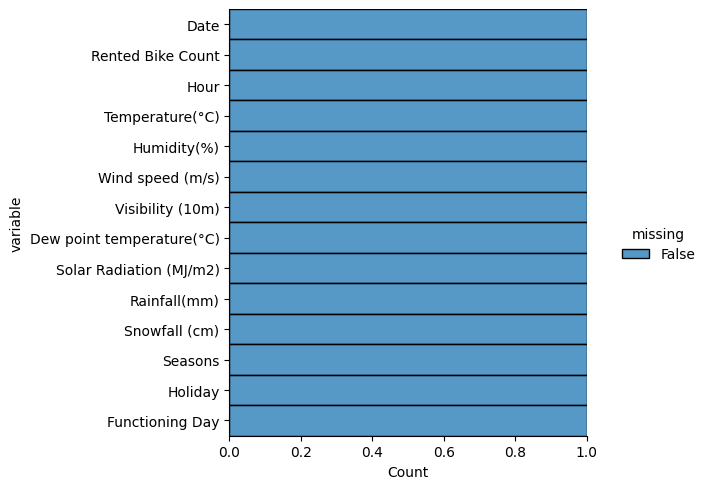

In [86]:
# Visualizing the missing values

plt.figure(figsize=(10,6))
sns.displot(data=df.isna().melt(value_name="missing"), y="variable", hue="missing", multiple="fill", aspect=1.25);

There are 14 variables in this dataset, 10 are numerical columns and 4 are categorical columns:

Numerical variables:

**Rented Bike Count** - Number of bikes rented on a particular date

**Hour** - Time of the bike rent (hourly based)

**Temperature(°C)** - Temperature in Celsius

**Humidity(%)** - Relative humidity

**Wind speed (m/s)** - Aind speed

**Visibility (10m)** - Visibility due to mist/fog measured in mtrs

**Dew point temperature(°C)** - Air temperature in Celsius

**Solar Radiation (MJ/m2)** - MJ/m2

**Rainfall(mm)** - Raining measure of raifall in mm
**Snowfall (cm)** -

Categorical variables:

**Date** - date of the bike rented

**Seasons** - season at the time of rental ('Winter', 'Spring', 'Summer', 'Autumn')

**Holiday** - whether the day is considered a holiday

**Functioning Day** - whether the day is neither a weekend nor holiday

The dependent variable is '**Rented Bike Count**'.

There are no missing values, null values or duplicates in this dataset.

**Understanding Your Variables**

In [87]:
# Dataset Columns
df.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

In [88]:
# Dataset Describe
df.describe().T

count         mean         std   min     25%  \
Rented Bike Count          8760.0   704.602055  644.997468   0.0  191.00   
Hour                       8760.0    11.500000    6.922582   0.0    5.75   
Temperature(°C)            8760.0    12.882922   11.944825 -17.8    3.50   
Humidity(%)                8760.0    58.226256   20.362413   0.0   42.00   
Wind speed (m/s)           8760.0     1.724909    1.036300   0.0    0.90   
Visibility (10m)           8760.0  1436.825799  608.298712  27.0  940.00   
Dew point temperature(°C)  8760.0     4.073813   13.060369 -30.6   -4.70   
Solar Radiation (MJ/m2)    8760.0     0.569111    0.868746   0.0    0.00   
Rainfall(mm)               8760.0     0.148687    1.128193   0.0    0.00   
Snowfall (cm)              8760.0     0.075068    0.436746   0.0    0.00   

                               50%      75%      max  
Rented Bike Count           504.50  1065.25  3556.00  
Hour                         11.50    17.25    23.00  
Temperature(°C)              13.70    22.50    39.40  
Humidity(%)                  57.00    74.00    98.00  
Wind speed (m/s)              1.50     2.30     7.40  
Visibility (10m)           1698.00  2000.00  2000.00  
Dew point temperature(°C)     5.10    14.80    27.20  
Solar Radiation (MJ/m2)       0.01     0.93     3.52  
Rainfall(mm)                  0.00     0.00    35.00  
Snowfall (cm)                 0.00     0.00     8.80

**Variables Description**

From the description we can understand that the bikes are not rented on few days as the minimum of rented bike count is 0.

The minimum value of 'Hour' is 0, as this feature is categorical, 0 means the first hour of the day.

The features - Dew point temperature(°C), Solar Radiation (MJ/m2), Rainfall(mm) and Snowfall (cm) have median(50 percentile) values very low compared to their maximum values, indicating the skewness of these columns.

In [89]:
# Checking Unique Values for each variable.
unique_values_df = pd.DataFrame(index = list(df.columns))
list_values = []
for var in list(df.columns):
 list_values.append(list(df[var].unique().tolist()))
unique_values_df['Unique Values'] = list_values
unique_values_df['Unique Values Count'] = df.nunique()
unique_values_df


Unique Values  \
Date                       [01/12/2017, 02/12/2017, 03/12/2017, 04/12/201...   
Rented Bike Count          [254, 204, 173, 107, 78, 100, 181, 460, 930, 4...   
Hour                       [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...   
Temperature(°C)            [-5.2, -5.5, -6.0, -6.2, -6.4, -6.6, -7.4, -7....   
Humidity(%)                [37, 38, 39, 40, 36, 35, 27, 24, 21, 23, 25, 2...   
Wind speed (m/s)           [2.2, 0.8, 1.0, 0.9, 2.3, 1.5, 1.3, 1.1, 0.5, ...   
Visibility (10m)           [2000, 1928, 1996, 1936, 793, 1913, 1687, 1380...   
Dew point temperature(°C)  [-17.6, -17.7, -18.6, -18.7, -19.5, -19.3, -19...   
Solar Radiation (MJ/m2)    [0.0, 0.01, 0.23, 0.65, 0.94, 1.11, 1.16, 1.01...   
Rainfall(mm)               [0.0, 0.5, 1.0, 2.5, 0.1, 0.2, 0.3, 0.7, 1.6, ...   
Snowfall (cm)              [0.0, 0.1, 0.3, 0.4, 0.2, 1.0, 0.9, 0.8, 0.7, ...   
Seasons                                     [Winter, Spring, Summer, Autumn]   
Holiday                                                [No Holiday, Holiday]   
Functioning Day                                                    [Yes, No]   

                           Unique Values Count  
Date                                       365  
Rented Bike Count                         2166  
Hour                                        24  
Temperature(°C)                            546  
Humidity(%)                                 90  
Wind speed (m/s)                            65  
Visibility (10m)                          1789  
Dew point temperature(°C)                  556  
Solar Radiation (MJ/m2)                    345  
Rainfall(mm)                                61  
Snowfall (cm)                               51  
Seasons                                      4  
Holiday                                      2  
Functioning Day                              2

**Observation:** Above table gives the details of unique values and count of unique values. There are 3 categorical columns (Seasons, Holiday and Functioning Day):

**Seasons** column has 4 unique values (**Winter, Spring, Summer, Autumn**)

**Holiday** and **Functioning Day** columns each have 2 unique values (**Holiday, No Holiday**) and (**Yes, No**) respectively.

##**Data Wrangling**

In [90]:
# We can split the column 'Date' into day, month and year.

df['weekday'] = pd.to_datetime(df['Date'], dayfirst=True, errors='coerce').dt.day_name()
df[['Day', 'Month', 'Year']] = df['Date'].str.split("/", expand = True)

# Dropping Date column as we have extracted all information
df.drop("Date", axis='columns', inplace = True)

df['week'] = df['weekday'].apply(lambda x:'Weekend'  if x=='Saturday' or  x=='Sunday'  else 'Weekdays')
df['Hour'] = df['Hour'].astype('object')

**Manipulations done**: Extracted the day, week, month and year features from "Date" column. From these columns, we can better understand the trend of rental bikes across days, weeks and months. The 'Hour' feature is changed from "integer" to "object".

## **Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables**

#### **Univariate Analysis**

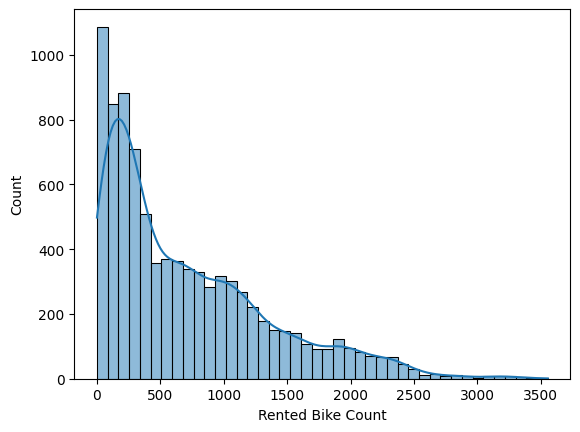

In [91]:
# Chart - 1 visualization code

sns.histplot(data=df, x='Rented Bike Count', kde = True);

**Plot used:** The histplots are used for understanding the distribution of data of a feature.

**Insights:** The count feature is right skewed having fewer data points at the right side of the chart.

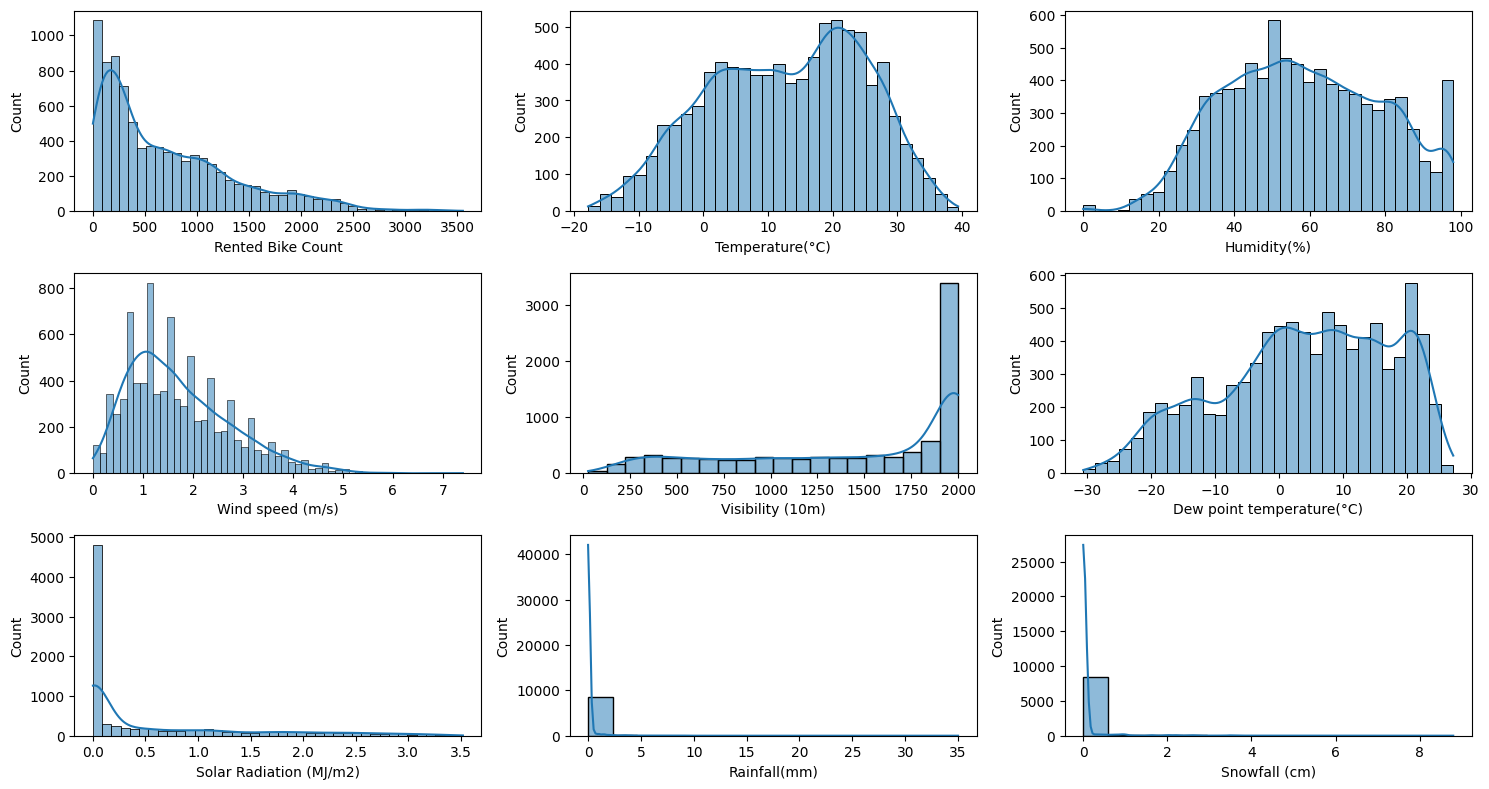

In [92]:
# Chart - 2 visualization code - histogram charts for numerical features

fig, axs = plt.subplots(nrows=3, ncols=3, figsize = (15, 8))
axs = axs.flatten()

ax_count = 0
for i in df.describe(include='number').columns:
  sns.histplot(data = df, x = df[i], ax=axs[ax_count], kde = True)
  ax_count +=1
plt.tight_layout()
plt.show()

**Plot used**: The histplot helps in understanding the distribution of the numerical features.

**Insights found**: From the plots, we understand that the 'Temperature', 'Humidity' and 'Dew point teperature' are close to normal distribution, where are 'solar radiation', 'rainfall' and 'snowfall' are highly skewed towards right and 'visibility' is highly skewed towards left.

#### **Bivariate Analysis**

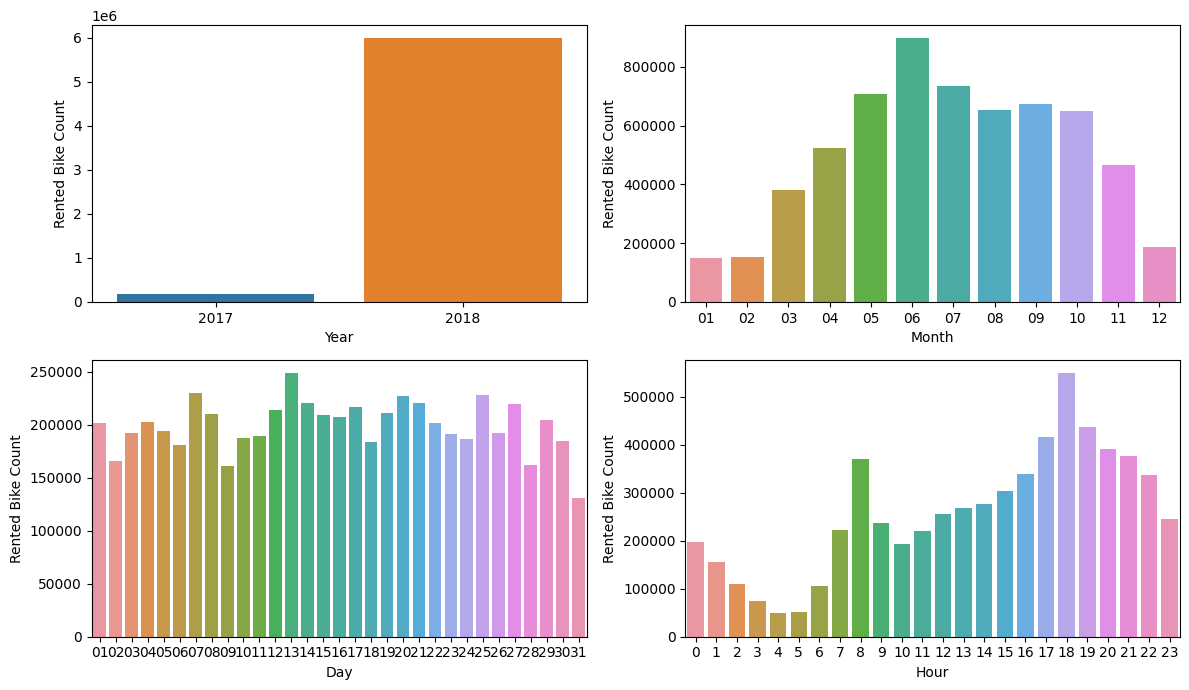

In [93]:
# Chart - 3 visualization code

df1 = df.loc[:, ['Year', 'Rented Bike Count']].groupby('Year')['Rented Bike Count'].sum().reset_index()
df2 = df.loc[:, ['Month', 'Rented Bike Count']].groupby('Month')['Rented Bike Count'].sum().reset_index()
df3 = df.loc[:, ['Day', 'Rented Bike Count']].groupby('Day')['Rented Bike Count'].sum().reset_index()
df4 = df.loc[:, ['Hour', 'Rented Bike Count']].groupby('Hour')['Rented Bike Count'].sum().reset_index()

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2, figsize = (12,7))

sns.barplot(data = df1, x = "Year", y="Rented Bike Count", ax=ax1)
sns.barplot(data = df2, x = "Month", y="Rented Bike Count",ax=ax2)
sns.barplot(data = df3, x = "Day", y="Rented Bike Count",ax=ax3)
sns.barplot(data = df4, x = "Hour", y="Rented Bike Count", ax=ax4)
plt.tight_layout()
plt.show()

**Plot used:** The bar plot is good for bivariate comparison. We can understand the variations of the rented bikes count for year, month, day and hour features.

**Insights found:** From the above charts we can say that the bookings were higher in year 2018. If we see month wise, highest bookings done in month of june. There is also highest count at 8AM and in the evening at 6PM. the bikes were rented mostly in morning and evening (peak hours).

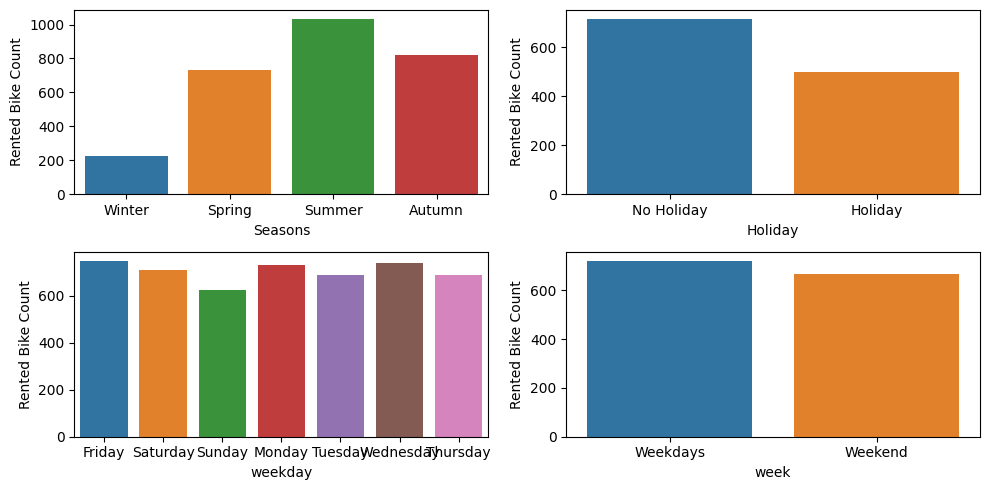

In [94]:
# Chart - 4 visualization code

fig, axs = plt.subplots(nrows=2, ncols=2, figsize = (10, 5))
axs = axs.flatten()

ax_count = 0
for i in ['Seasons', 'Holiday', 'weekday', 'week']:
  sns.barplot(data = df, x = i, y="Rented Bike Count", ax=axs[ax_count], errorbar = None)
  ax_count +=1
plt.tight_layout()
plt.show()


**Plot used**: The bar plot is good for bivariate comparison. We can understand the variations of the rented bikes count for Seasons and Holiday features.

**Insights found:** The barplot shows that the bikes were rented mostly in summer season and workingdays(no holidays).There is almost equal demand for entire week except Sundays, we can assume here the dip of count is due to weekend.

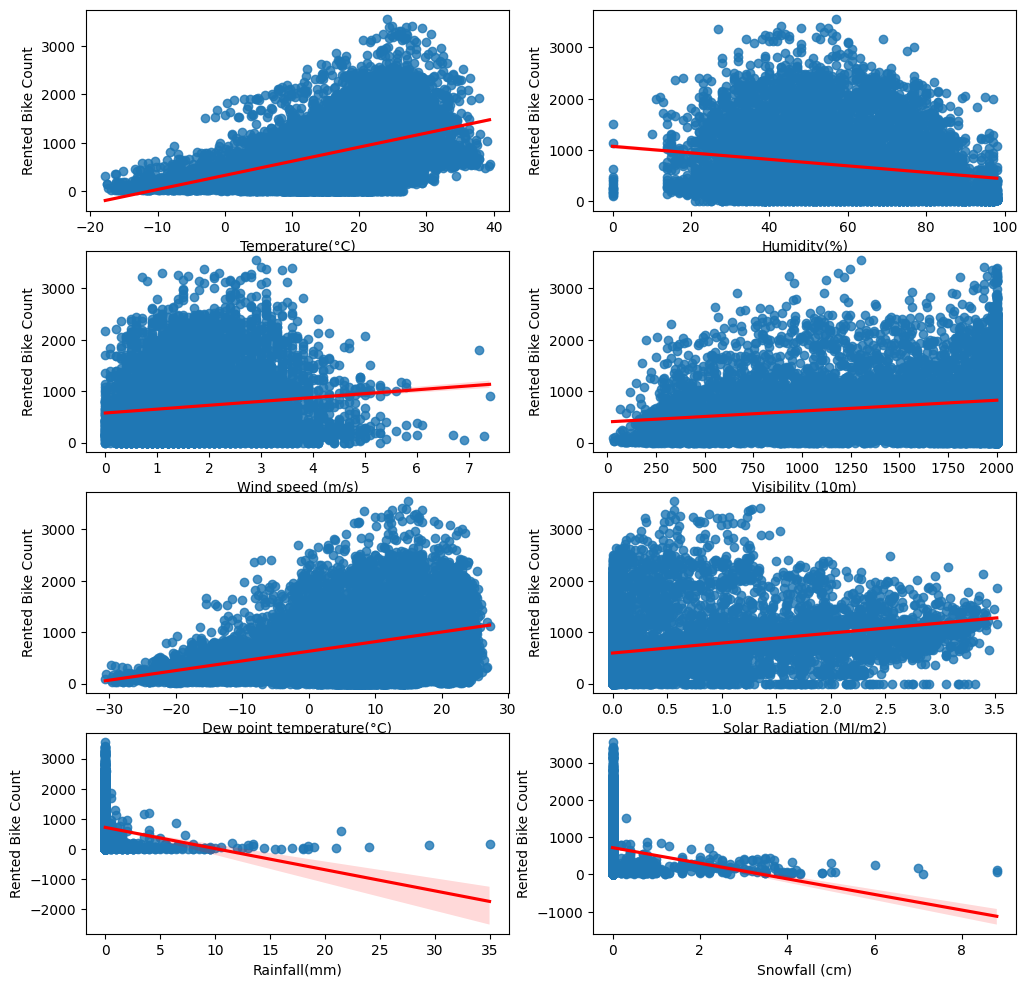

In [95]:
# Chart - 5 visualization code

#bikes rentals with respect to weather conditions
fig, axs = plt.subplots(nrows=4, ncols=2, figsize = (12,12))
axs = axs.flatten()
ax_cnt = 0
for i in df.drop(columns = ['Rented Bike Count']).describe(include='number').columns:
  sns.regplot(x = df[i], y = "Rented Bike Count", data = df, ax=axs[ax_cnt], line_kws={"color": "red"})
  ax_cnt +=1
plt.show()


**Plot used:** regplot gives the information about corelation of the 2 features. The red line is regression line which shows how the x-axis feature is related with y-axis feature.

**Insights found:** We see that 'Humidity', 'ranifall' and 'Snowfall' are negatively corelated and rest of the features in plot are positively correlated with 'Rented Bike count' feature.

Text(0.5, 1.0, 'Total bike rentals per hour for a week')

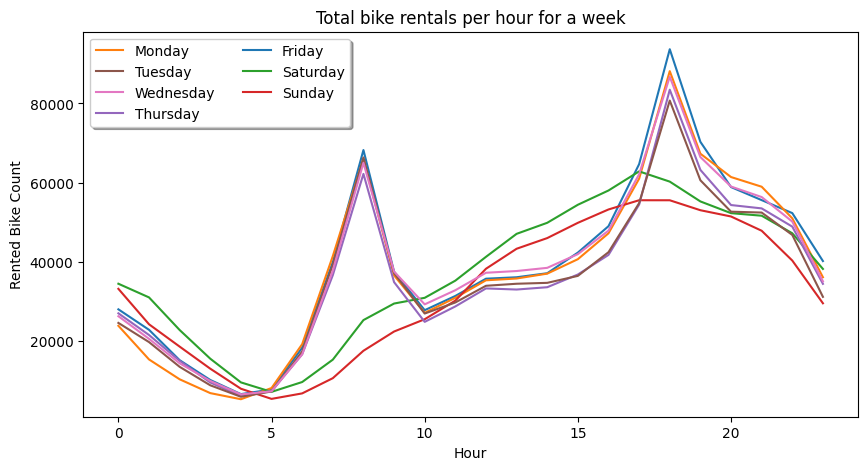

In [96]:
# Chart - 6 visualization code
#Rented bikes count per hour on weekday basis

fig = plt.figure(figsize=(10, 5))

group_day_hour = pd.DataFrame(df.groupby(['weekday', 'Hour'])['Rented Bike Count'].sum()).reset_index()
sns.lineplot(data=group_day_hour, x='Hour', y='Rented Bike Count', hue='weekday')

handles, labels = plt.gca().get_legend_handles_labels()
handles = [handles[1], handles[5], handles[6], handles[4], handles[0], handles[2], handles[3]]
labels = [labels[1], labels[5], labels[6], labels[4], labels[0], labels[2], labels[3]]
plt.legend(handles, labels, ncol=2, shadow=True, loc='upper left')
plt.title("Total bike rentals per hour for a week")

**Plot used:**The lineplot shows the hourly count variations across weekdays.

**Insights found:** We can see that the counts on weekends dip in peak hours and increases in the afternoon time. Similarly, we see the increase in count on weekdays duing peak hours.

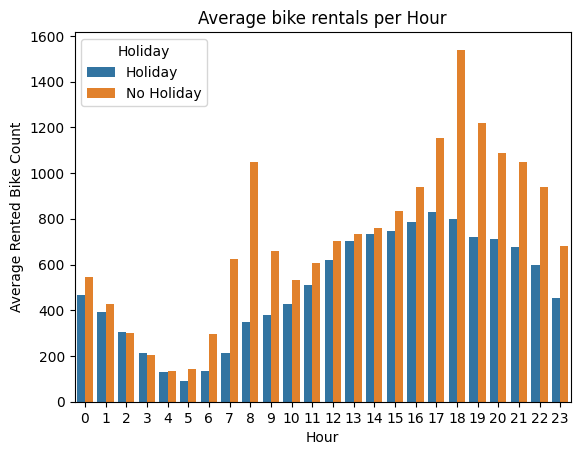

In [97]:
# Chart - 7 visualization code

df_mean_hourly = df.loc[:, ['Hour', 'Holiday', 'Rented Bike Count']].groupby(['Hour','Holiday'])['Rented Bike Count'].mean().reset_index()
sns.barplot(data=df_mean_hourly, x='Hour', y='Rented Bike Count', hue='Holiday')
plt.title('Average bike rentals per Hour')
plt.ylabel("Average Rented Bike Count")
plt.show()

**Insights:** The hourly count on non-holidays is more that on holidays

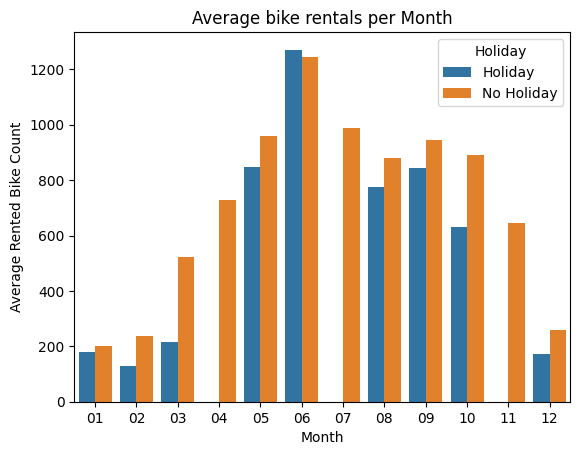

In [98]:
# Chart - 8 visualization code

df_mean_monthly = df.loc[:, ['Month', 'Holiday', 'Rented Bike Count']].groupby(['Month','Holiday'])['Rented Bike Count'].mean().reset_index()
sns.barplot(data=df_mean_monthly, x='Month', y='Rented Bike Count', hue='Holiday')
plt.title('Average bike rentals per Month')
plt.ylabel("Average Rented Bike Count")
plt.show()

**Insights:** The plot of monthly count on holiday feature - there is higher bike rentals between May and October months. And highest in June month.

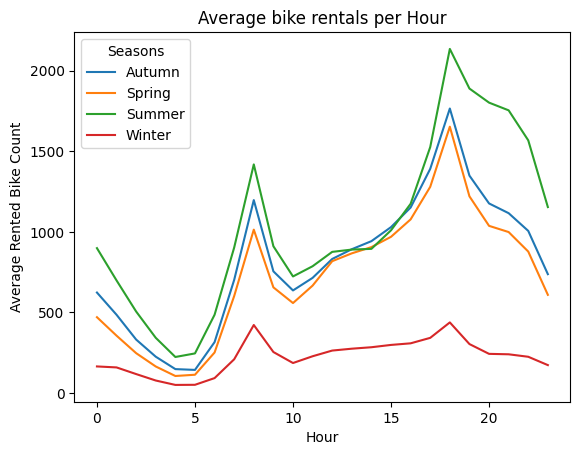

In [99]:
# Chart - 9 visualization code
mean_hourly = df.loc[:, ['Hour', 'Seasons', 'Rented Bike Count']].groupby(['Hour','Seasons'])['Rented Bike Count'].mean().reset_index()
sns.lineplot(data=mean_hourly, x='Hour', y='Rented Bike Count', hue='Seasons')
plt.title('Average bike rentals per Hour')
plt.ylabel("Average Rented Bike Count")
plt.show()

**Plot used:** Line plot is easier to understand the variations between different categories of a feature.

**Insights:** lineplot gives the variations in counts between categories.The count is higher in summer and autumn seasions and lowest in winter season.

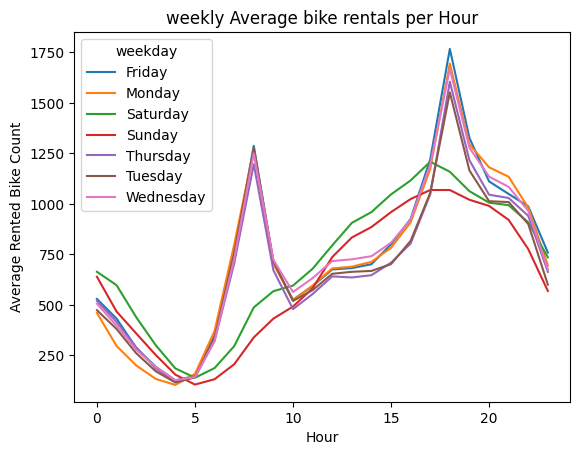

In [100]:
# Chart - 10 visualization code

weekday_mean_hourly = df.loc[:, ['Hour', 'weekday', 'Rented Bike Count']].groupby(['Hour','weekday'])['Rented Bike Count'].mean().reset_index()
sns.lineplot(data=weekday_mean_hourly, x='Hour', y='Rented Bike Count', hue='weekday')
plt.title('weekly Average bike rentals per Hour')
plt.ylabel("Average Rented Bike Count")
plt.show()


**Insights found:** We see that the count is higher in peak hours as we have already observed it in previous plots. And the plot shows the high count during peak hours on weekdays(week 0 to week 4) and high count in the middle of the day on weekends (week 5 and week 6)

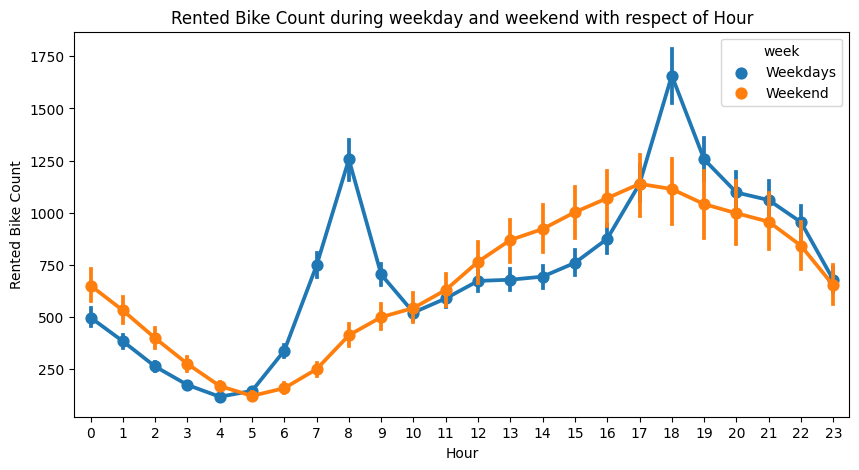

In [101]:
# Chart - 11 visualization code
plt.figure(figsize=(10,5))

sns.pointplot(x=df["Hour"],y=df['Rented Bike Count'],hue=df['week'])
plt.title("Rented Bike Count during weekday and weekend with respect of Hour");

**Insights found:** The plot shows the bike demand is higher in weekend afternoons whereas the demand is higher during office hours in weekdays.

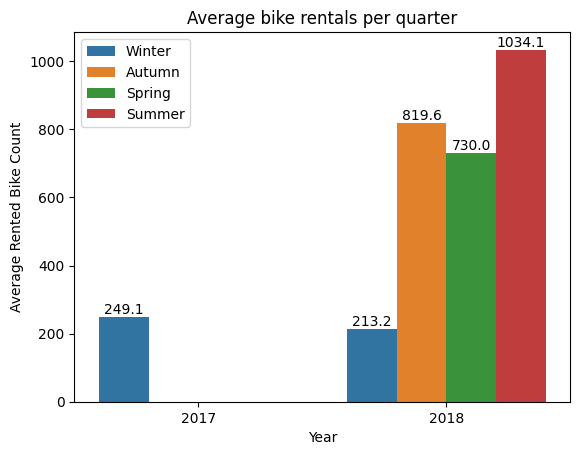

In [102]:
# Chart - 12 visualization code

df_mean_quarterly = df.loc[:, ['Year', 'Seasons', 'Rented Bike Count']].groupby(['Year','Seasons'])['Rented Bike Count'].mean().reset_index()
ax = sns.barplot(data=df_mean_quarterly, x='Year', y='Rented Bike Count', hue='Seasons')

for bars in ax.containers:
        ax.bar_label(bars, fmt='%.1f')

plt.title('Average bike rentals per quarter')
plt.ylabel("Average Rented Bike Count")
plt.legend(loc = 'upper left')
plt.show()

**Insights:** The count is higher in year 2018 than 2017, this maybe because the company was new in 2017 and most users are unaware of it.

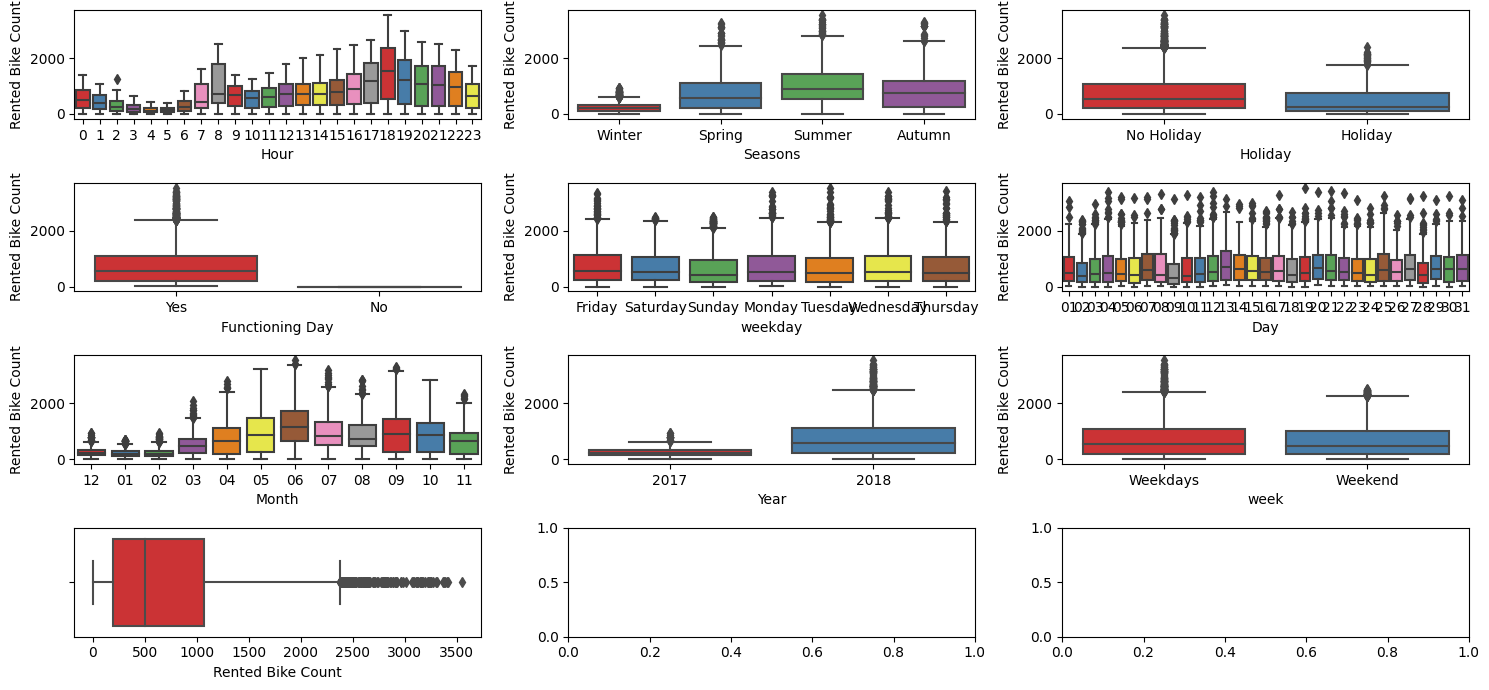

In [103]:
# Chart - 13 visualization code
fig, ax= plt.subplots(nrows=4, ncols=3, figsize = (15,7))
ax=ax.flatten()
cnt=0
for i in df.describe(include='object').columns:
  sns.boxplot(data = df, x = df[i], y="Rented Bike Count", ax=ax[cnt], palette = 'Set1')
  cnt+=1
sns.boxplot(data = df, x = "Rented Bike Count", ax=ax[cnt], palette = 'Set1')
plt.tight_layout()
plt.show()


**Plot used:** The boxplot is ideal for understanding the presence of outliers in the features.

**Insights found:** From the plot, we understand that there are outliers in summer, Spring seasions, non holidays, weekdays (compared to weekends) and day columns. There are few outliers in dependent variable "Rented Bike Count" as well. As the outliers seem very less, it may not effect our analysis

Rented Bike Count            1.000000
Temperature(°C)              0.538558
Humidity(%)                 -0.199780
Wind speed (m/s)             0.121108
Visibility (10m)             0.199280
Dew point temperature(°C)    0.379788
Solar Radiation (MJ/m2)      0.261837
Rainfall(mm)                -0.123074
Snowfall (cm)               -0.141804
Name: Rented Bike Count, dtype: float64 
 --------------------------------------------------


<Axes: >

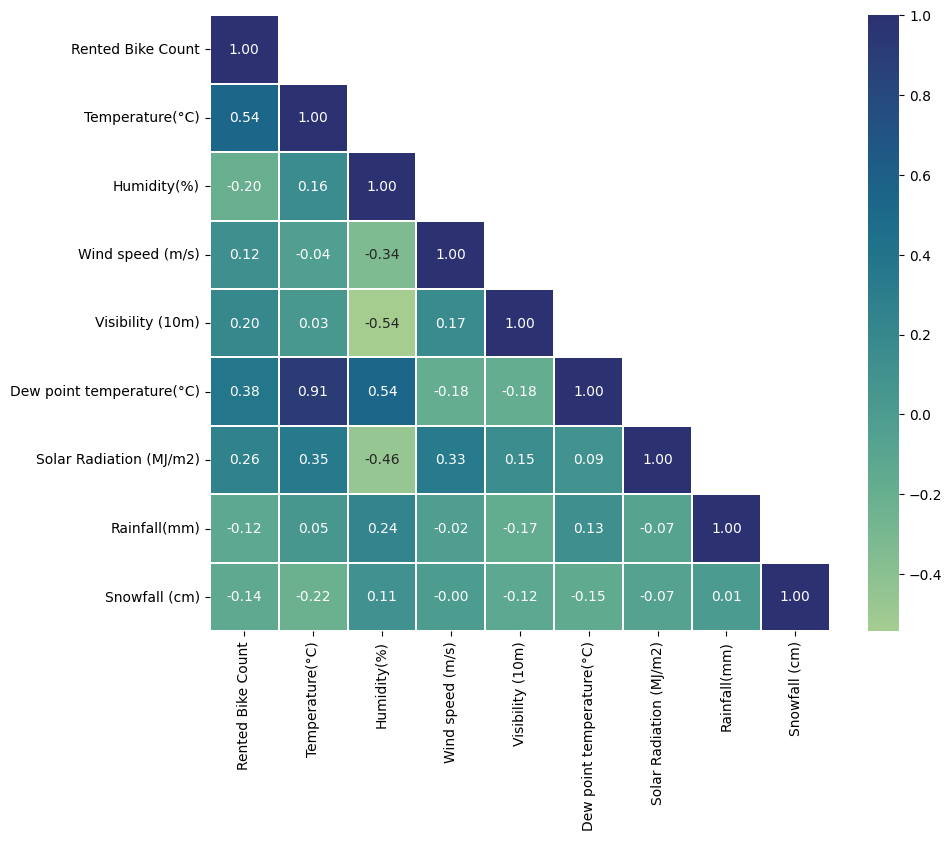

In [104]:
#Chart - 14 - Correlation Heatmap
print(df.corr()['Rented Bike Count'], '\n', ('-'*50))
# Correlation Heatmap visualization code
plt.figure(figsize=(10,8))
correlations = df.corr()
mask = np.array(correlations)
mask[np.tril_indices_from(mask)] = False
sns.heatmap(correlations, mask=mask, annot = True, fmt=".2f", cmap='crest', linewidths=0.1)

**Plot used:** correlation map shows the bivariate correlation between features.

**Insights found:** We can see that the "rented bike count" feature is highly corelated with Temperature, Hour and Dew point temperature. And we can also see high corelation between independent features -  Temperature and Dew point temperature, as well as Dew point temperature and Humidity.

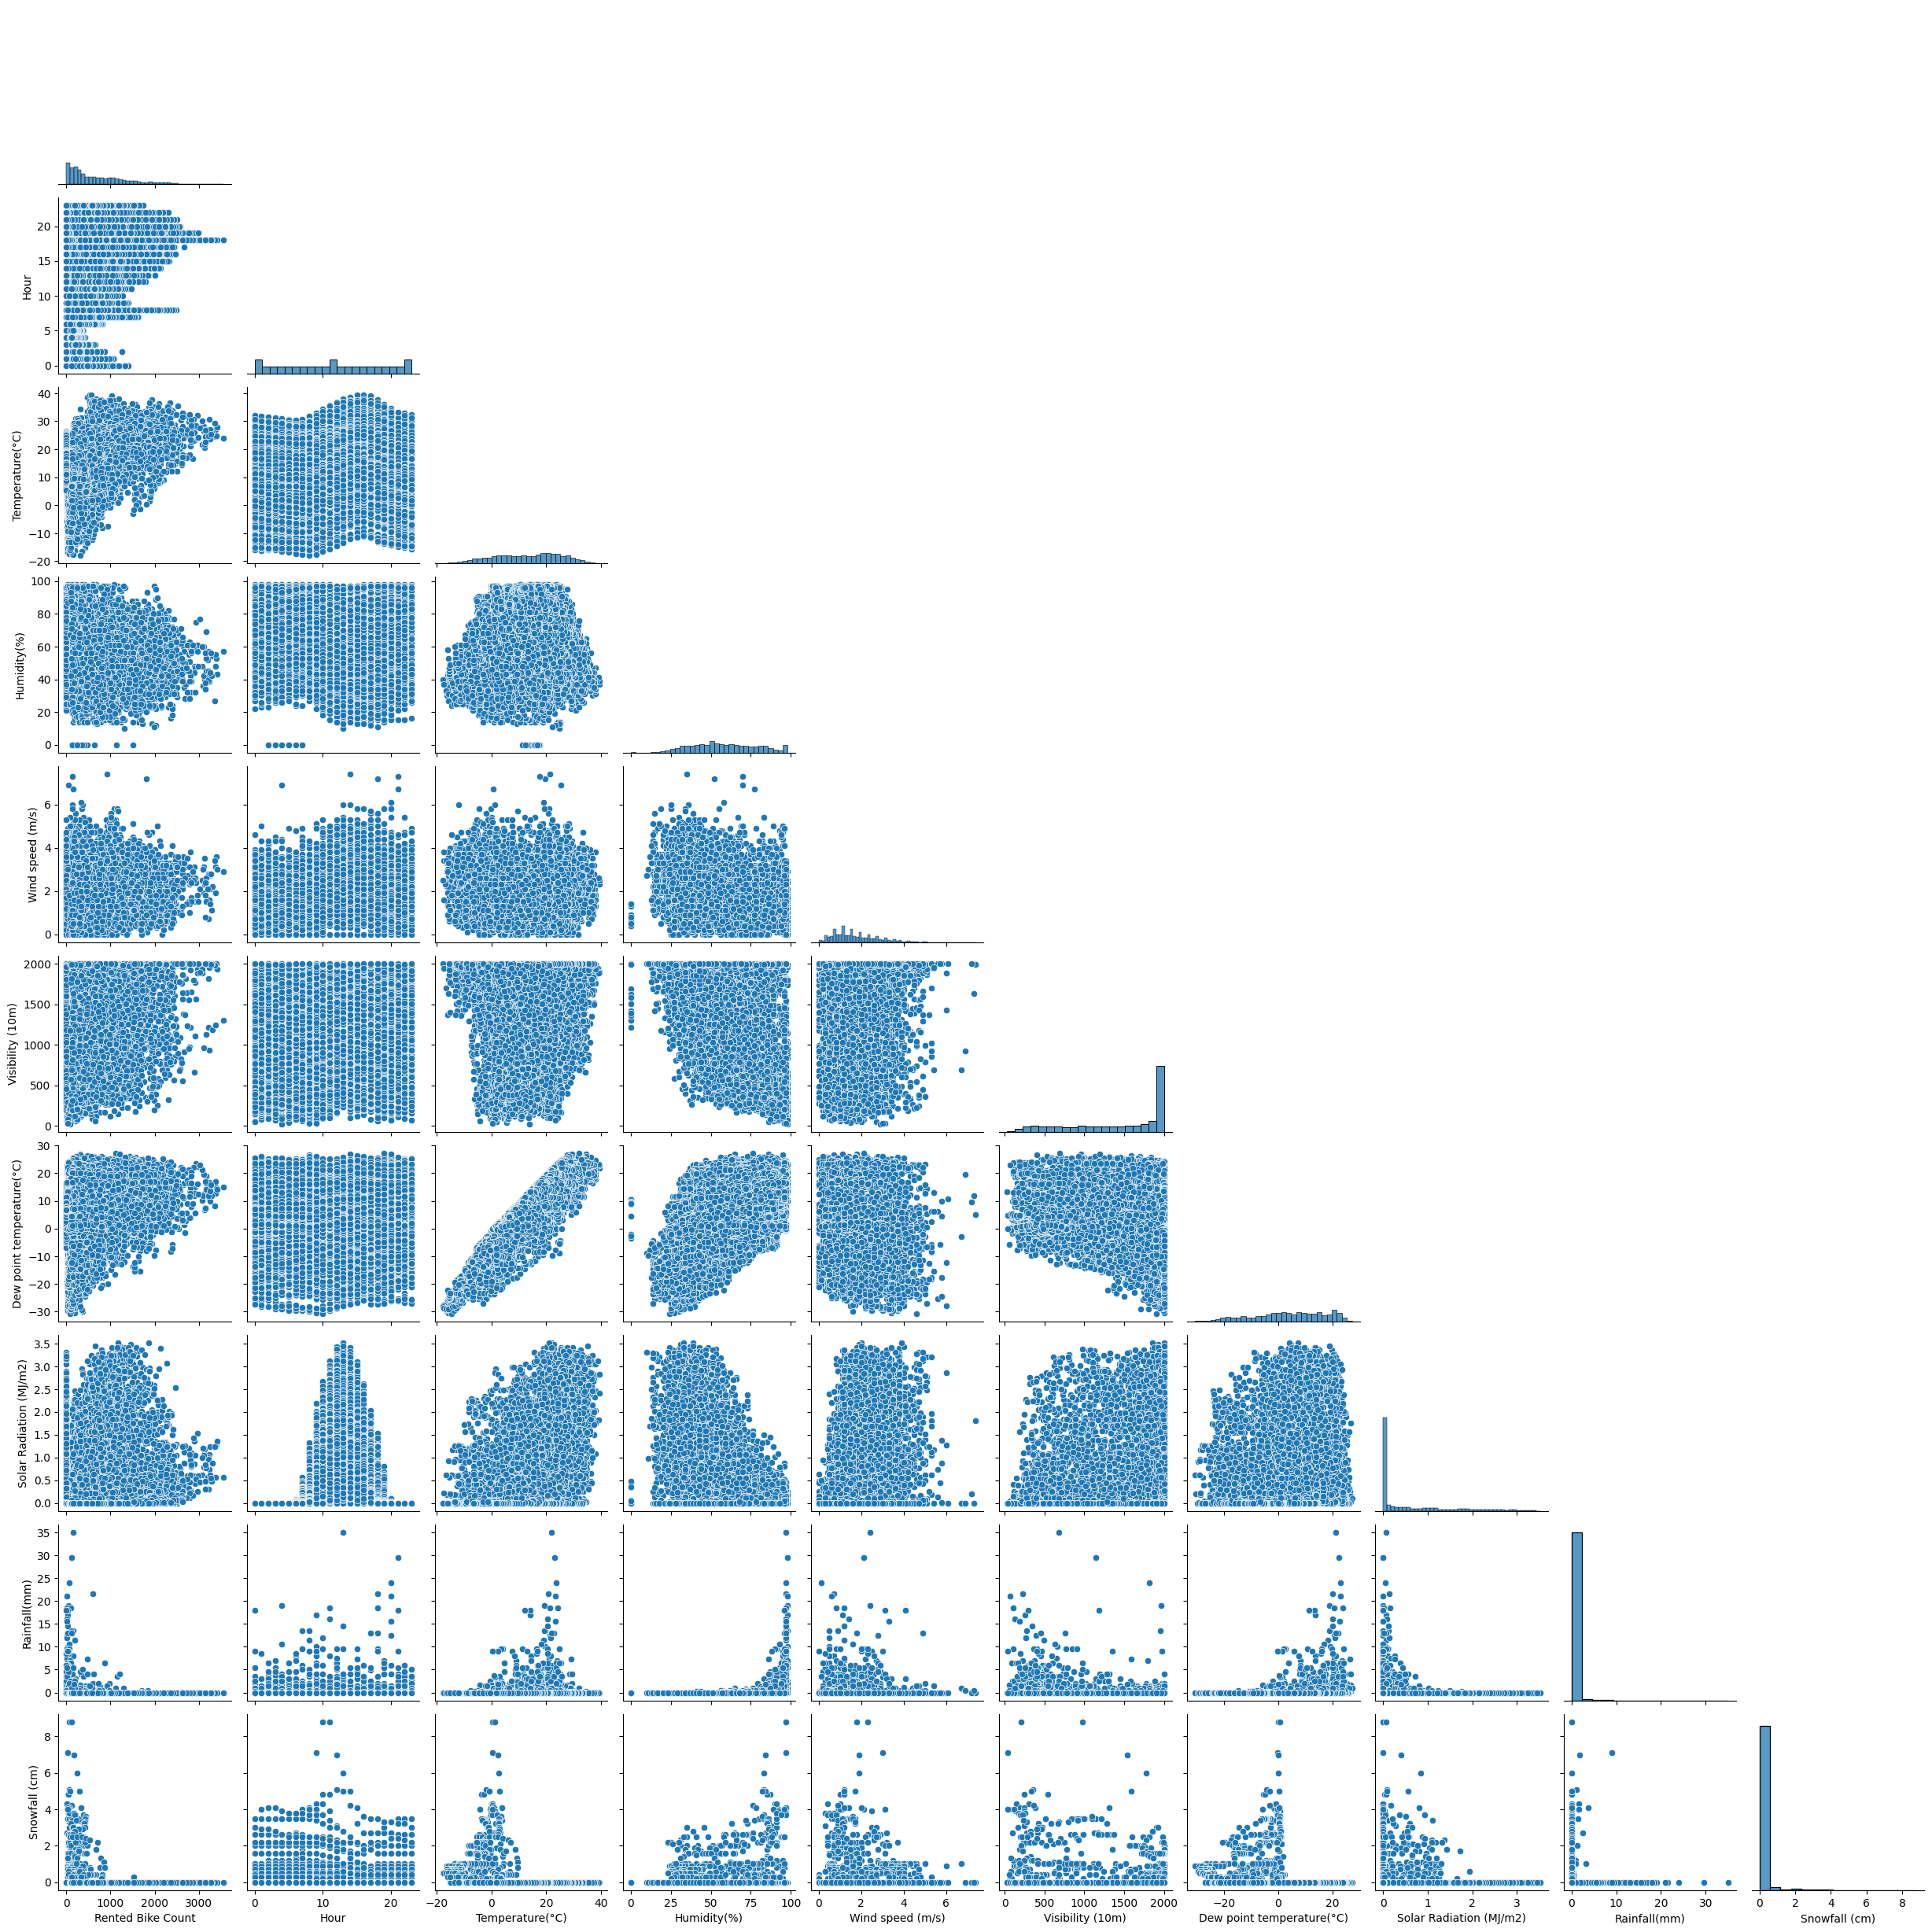

In [105]:
# Chart - 15 - Pair Plot
# Pair Plot visualization code
sns.pairplot(df, corner=True, palette='crest')


**Plot used:** pair plot shows the bivariate distribution of the data.

**Insights found:** We can see that very few features are normally distributed with respect to "Rented Bike count" feature.

## **Hypothesis Testing**

####**Hypothetical Statement - 1**

**Hourly count:**

**H0**: The average rented bike count is same every hour in a day, µ = µ0.


**H1**: The average rented bike count per hour is higher in peak hours (8am and 5pm to 9pm), µ ≠ µ0.

**Significance Value** = 0.05


In [106]:
#converting hour values to peak(p) and non-peak (np) categories
df_peak = df.loc[:, ['Hour', "Rented Bike Count"]]
for i in df_peak['Hour'].unique():
  if i in [8, 17, 18, 19, 20, 21]:
    df_peak['Hour'].replace(i,'p', inplace=True)
  else:
    df_peak['Hour'].replace(i,'np', inplace=True)

#counting the values for both peak(p) and non-peak (np) categories
df_peak['Hour'].value_counts()

np    6570
p     2190
Name: Hour, dtype: int64

Mean of Peak hours and Non-Peak hours respectively: 1083.5, 475.5

LeveneResult(statistic=22.919558949507213, pvalue=5.986480519656862e-06) 



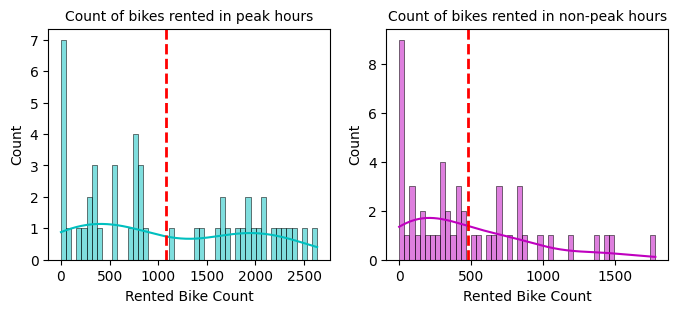

In [107]:
#taking samples of data for both peak and non-peak hours

p_sample = df_peak[df_peak['Hour'] == 'p'].sample(50, replace = False)
np_sample = df_peak[df_peak['Hour'] == 'np'].sample(50, replace = False)


# Function to calculate mean values for both categories
def check_mean(sample1, sample2):
  print(f"Mean of Peak hours and Non-Peak hours respectively: {round(sample1['Rented Bike Count'].mean(),1)}, {round(sample2['Rented Bike Count'].mean(),1)}\n")


# Function to plot the distribution
def plots(sample1, sample2):
  fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols=2, figsize = (8,3))
  sns.histplot(data = sample1['Rented Bike Count'], bins = 50, kde = True, ax = ax1, color = 'c')
  ax1.axvline(sample1['Rented Bike Count'].mean(), color='r', linestyle='--',linewidth=2)
  ax1.set_title('Count of bikes rented in peak hours', fontsize=10)
  sns.histplot(data = sample2['Rented Bike Count'], bins = 50, kde = True, ax = ax2, color = 'm')
  ax2.axvline(sample2['Rented Bike Count'].mean(), color='r', linestyle='--',linewidth=2)
  ax2.set_title('Count of bikes rented in non-peak hours', fontsize=10)
plt.show()

# Checking equality of mean, variance of counts on peak and non-peak hours
check_mean(p_sample, np_sample)
print(stats.levene(p_sample['Rented Bike Count'], np_sample['Rented Bike Count']),'\n')

# Checking normality of the distribution
plots(p_sample, np_sample)

**Observation:** From above plot we can see that the data of both the categories slightly right skewed. We can transform the data to normalize the data. And stat.lavene gives the p_value < 0.05, indicating the inequality of variances.

Mean of Peak hours and Non-Peak hours respectively: 6.1, 5.3

LeveneResult(statistic=0.0024037774381385564, pvalue=0.9609965003059039)


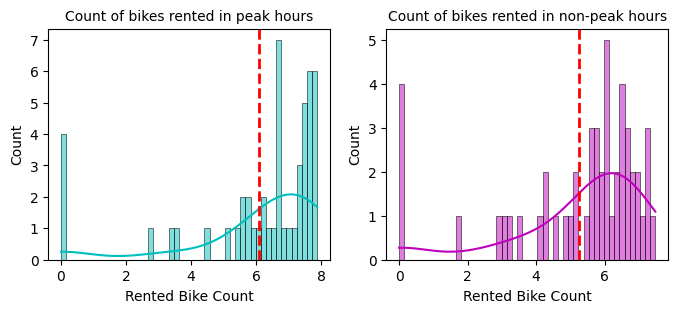

In [108]:
#Applying BoxCox Transformation
p_sample_tansfomed= boxcox1p(p_sample['Rented Bike Count'], 0, out=None).reset_index()   #applied boxcox transform to get through the divide by zero error
np_sample_tansfomed= boxcox1p(np_sample['Rented Bike Count'], 0, out=None).reset_index()

#checking mean, variance and distribution plot after transformation
check_mean(p_sample_tansfomed, np_sample_tansfomed)
print(stats.levene(p_sample_tansfomed['Rented Bike Count'], np_sample_tansfomed['Rented Bike Count']))
plots(p_sample_tansfomed, np_sample_tansfomed)

**Statistical test performance**

In [109]:
# Perform Statistical Test to obtain P-Value
# Using Z-Test to test the Null Hypothesis

z_score,p_value = stests.ztest(p_sample_tansfomed['Rented Bike Count'], np_sample_tansfomed['Rented Bike Count'], value = 0)
print('z_score,p_value:',z_score,p_value, '\n')

def pvalue(p):
  if p<0.05:
    print("We reject the Null Hypothesis")
  else:
    print("We fail to reject the Null Hypothesis")


pvalue(p_value)

z_score,p_value: 2.0077906011488156 0.04466554802694448 

We reject the Null Hypothesis


**statistical test**- The 2 sample z-test is used to check the similarity of average counts on peak and non peak hours.

**Why the specific statistical test?**: To check the mean of the samples for the two groups (peak and non-peak hours) with size greater than 30, z-test is more suitable. To reduce the effect of skewness of data, the p-value is obtained after applying the boxcox transform on both the samples.I have used the boxcox transform to handle the division of sample data with zeros.

**Observation**: The p-value obtain is highly significant, less than 0.05. hence, we reject the null hypothesis and conclude that the mean count of rented bikes is higher in peak hours.

####**Hypothetical Statement - 2**

**The rented bike count is equal on both holidays and non- holidays:**

**H0**
: The average count of rented bikes on holidays **is equal** to the average count on non holidays


**H1**
: The average count of rented bikes on holidays **is not equal** to the average count on non holidays

**Significance Value** = 0.05

Using two sample t-test for this hypothesis testing.

**Assumptions**:

*   Samples taken must be random from the population dataset.
*   Sample data should be continous and normally distributed.
*   The values of samples taken must be independent of each other & variances for the two independent samples are equal.

In [110]:
# Perform Statistical Test to obtain P-Value
print(df['Holiday'].value_counts(), '\n', '-'*30)
df.groupby("Holiday")['Rented Bike Count'].mean().reset_index().rename(columns={'Rented Bike Count': 'mean_value'})

No Holiday    8328
Holiday        432
Name: Holiday, dtype: int64 
 ------------------------------


Holiday  mean_value
0     Holiday  499.756944
1  No Holiday  715.228026

LeveneResult(statistic=15.499600728226023, pvalue=9.223378939875319e-05) 



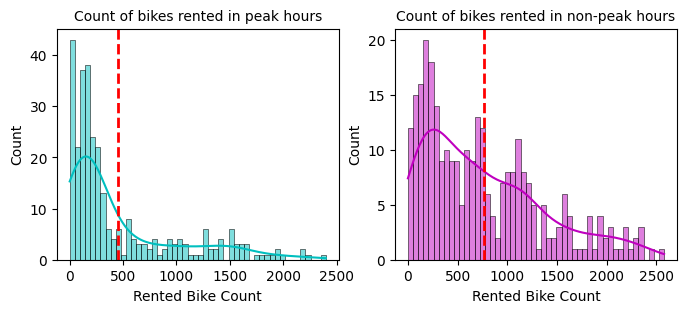

In [111]:
#taking samples of data for both holidays and non-holidays features

no_holiday_data = df[df['Holiday'] == 'No Holiday'].sample(300, replace = False)
holiday_data = df[df['Holiday'] == 'Holiday'].sample(300, replace = False)

#checking variances equality of both the data samples
print(stats.levene(holiday_data['Rented Bike Count'], no_holiday_data['Rented Bike Count']), '\n')

plots(holiday_data, no_holiday_data)

**Observation**: - We see that the p_value is less than 0.05, this indicates variances are not equal for both the samples. And rented bike counts of both data sets are right skewed, we can apply log transform to normalise the data samples.

LeveneResult(statistic=12.833560688304972, pvalue=0.0003681677876282793) 



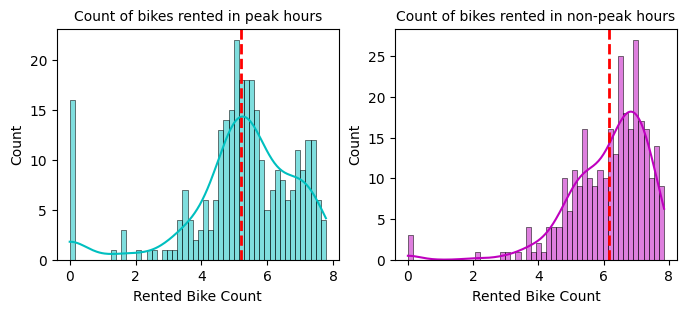

In [112]:
#applying log transformation on count columns of both the samples

fitted_no_holiday_data= boxcox1p(no_holiday_data['Rented Bike Count'], 0, out=None).reset_index()
fitted_holiday_data= boxcox1p(holiday_data['Rented Bike Count'], 0, out=None).reset_index()

#checking mean and variance after log transform
print(stats.levene(fitted_holiday_data['Rented Bike Count'], fitted_no_holiday_data['Rented Bike Count']), '\n')

plots(fitted_holiday_data, fitted_no_holiday_data)


**Observation**: The plots shows that the data is close to normal distribution and the p_value
 of stats.lavene is greater than 0.05 (variances are almost equal).

**Statistical test performance**

In [113]:
#Using 2 sample T-test for testing this hypothesis
statistic, p_value = stats.ttest_ind(fitted_holiday_data['Rented Bike Count'], fitted_no_holiday_data['Rented Bike Count'], equal_var=True)
print("statistic, p_value:", statistic, p_value, '\n')
pvalue(p_value)

statistic, p_value: -7.781906399573779 3.153325924779354e-14 

We reject the Null Hypothesis


Here, as the data is categoical, 2 sample **T-test** is used for getting p-value.

T-test is best suits for comparing 2 groups of data. splitting the data into holiday and non holiday goups and performed t-test to understand the similaity in the group data.

**Hypothetical Statement - 3**

**Count varies on different rainfall levels:**

**H0**: The mean of rented bike counts is same on all level of rainfall

**H1**:The mean of rented bike counts is low on high level of rainfall

**Significance Value** = 0.05

In [114]:
# Perform Statistical Test to obtain P-Value
rain_days = df.loc[:, ['Rainfall(mm)', 'Rented Bike Count']]

#splitting rainfall feature into 3 categories
rain_days['rainfall_level'] = pd.cut(df['Rainfall(mm)'],3, labels=['low', 'medium', 'high'])
print(rain_days['rainfall_level'].value_counts(), '\n')
print('-'*30)
rain_days.groupby('rainfall_level')['Rented Bike Count'].mean().reset_index().rename(columns={"Rented Bike Count":"Mean_count"})

low       8740
medium      17
high         3
Name: rainfall_level, dtype: int64 

------------------------------


rainfall_level  Mean_count
0            low  706.029405
1         medium   75.470588
2           high  111.333333

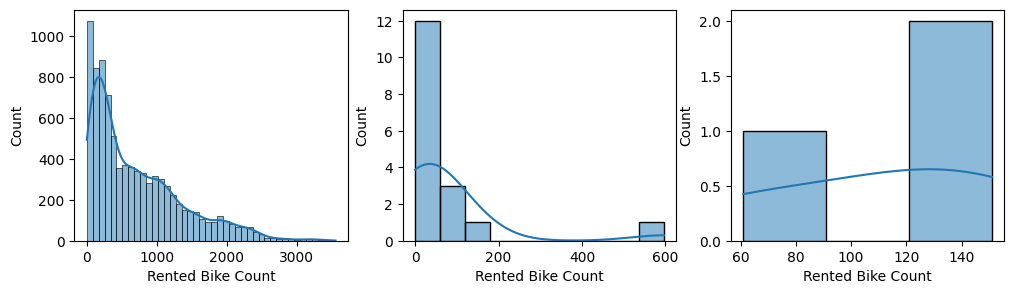

In [115]:
fig, axs = plt.subplots(nrows = 1, ncols=3, figsize = (12,3))
j=0
for i in ['low', 'medium', 'high']:
  sns.histplot(x = rain_days.loc[rain_days['rainfall_level']==i]['Rented Bike Count'], kde = True, ax=axs[j])
  j+=1
plt.show()

In [116]:
#taking samples
low_rain = rain_days.loc[rain_days['rainfall_level']=='low']
moderate_rain = rain_days.loc[rain_days['rainfall_level']=='medium']
high_rain = rain_days.loc[rain_days['rainfall_level']=='high']

print(low_rain.shape, moderate_rain.shape, high_rain.shape)

#applying boxcox transform on all 3 samples
low_rain_transformed = boxcox1p(low_rain['Rented Bike Count'], 0, out=None)
moderate_rain_transformed = boxcox1p(moderate_rain['Rented Bike Count'], 0, out=None)
high_rain_transformed = boxcox1p(high_rain['Rented Bike Count'], 0, out=None)

(8740, 3) (17, 3) (3, 3)


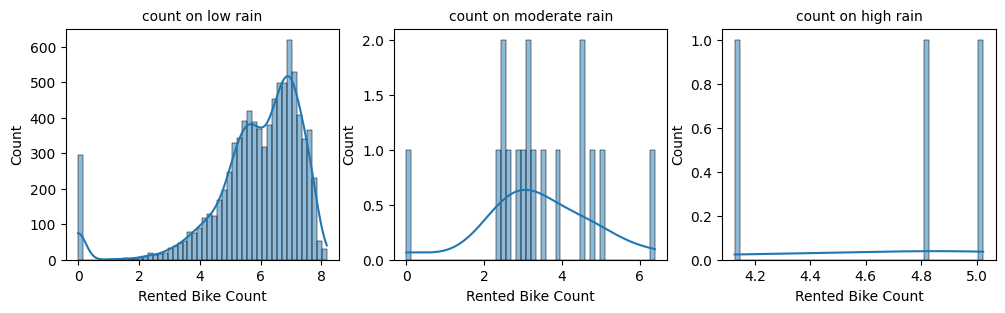

----------------------------------------------------------------------------------------------------


LeveneResult(statistic=0.7805232239709364, pvalue=0.45819809655121435)

In [117]:
#plot of transformed data of rainfall

fig, (ax1, ax2, ax3) = plt.subplots(nrows = 1, ncols=3, figsize = (12,3))

sns.histplot(data =low_rain_transformed, bins = 50, kde = True, ax = ax1)
ax1.set_title('count on low rain', fontsize=10)

sns.histplot(data = moderate_rain_transformed, bins = 50, kde = True, ax = ax2)
ax2.set_title('count on moderate rain', fontsize=10)

sns.histplot(data = high_rain_transformed, bins = 50, kde = True, ax = ax3)
ax3.set_title('count on high rain', fontsize=10)

plt.show()
print("-"* 100)
stats.levene(low_rain_transformed, moderate_rain_transformed, high_rain_transformed)

**Statistical test performance**

In [118]:
statistic, p_value = stats.f_oneway(low_rain_transformed, moderate_rain_transformed, high_rain_transformed)
print(statistic, p_value)

pvalue(p_value)

21.837826825242786 3.46357721008803e-10
We reject the Null Hypothesis


**Interpretation of results** : by using One way Anova test, we got the p_value less than 0.05. Thus, we can reject the null hyplothesis and conclude that the count of rented bikes is different on different rainfall levels.

**Test used:** The One way Anova test is used for checking the count differences in different range of rainfall.

**Insights found:** The Anova test is used for exploring the impact of one single factor on three or more groups. Since, we want to calculate and compare mean values of counts at different level of rainfall feature. Anova test is best suitable for our analysis.

##**Feature Engineering & Data Pre-processing**

In [119]:
# The "Day" feature has highest categories and it may lead to overfitting the model and considering hour, month and year features from date column provide sufficient information for our model, we can drop day feature.
# The feature weekday seem insignificant as we can use weekdays and weekends category from week column.

df.drop(['Day', "weekday"], axis = "columns", inplace = True)

**Handling Outliers**

Feature  % Of Outliers
0          Rented Bike Count       1.803653
1            Temperature(°C)       0.000000
2                Humidity(%)       0.000000
3           Wind speed (m/s)       1.837900
4           Visibility (10m)       0.000000
5  Dew point temperature(°C)       0.000000
6    Solar Radiation (MJ/m2)       7.317352
7               Rainfall(mm)       6.027397
8              Snowfall (cm)       5.057078

-----------------------------------------------------------------------------------------------------------------------------


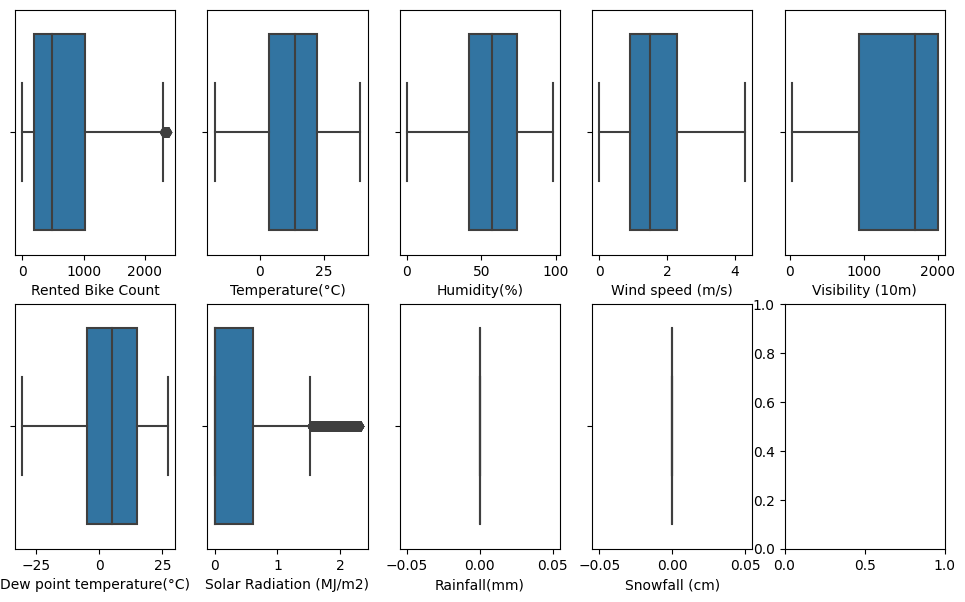

In [120]:
# Handling Outliers & Outlier treatments

#outliers detection for numerical columns
def check_outliers(df):
  fig, ax = plt.subplots(2, 5, figsize=(12, 7))
  ax = ax.flatten()
  k=0
  outliers_percent=[]
  col_num = df.describe().columns

  for i in col_num:
    Q1,Q3=df[i].quantile(0.25),df[i].quantile(0.75)
    IQR=Q3-Q1      # identify outliers
    lower,upper = Q1-1.5*IQR, Q3+1.5*IQR     #lower & upper percentile
    outliers = [x for x in df[i] if x < lower or x > upper]
    outliers_excluded_rows = [x for x in df[i] if x >= lower and x <= upper]
    outliers_percent.append((len(outliers)/(len(outliers)+len(outliers_excluded_rows)))*100)
    col = pd.Series(outliers_excluded_rows, name = i)  # getting features without outliers

    #.plot after outliers removed
    sns.boxplot(x = col, ax=ax[k])
    ax[k].set(xlabel = i)

    k+=1
  Outliers = pd.DataFrame({'Feature':list(col_num),'% Of Outliers':outliers_percent})

  display(Outliers)
  print('-'*125)
check_outliers(df)

**Method used:** The interquartile technique is used to detect the percentage of outliers in the dataset.

**Observation**: The features 'Solar Radiation (MJ/m2)', 'Snowfall (cm)', and 'Rainfall(mm)' have high percent of outliers compared to others. And we have already observed that the features 'Snowfall (cm)', and 'Rainfall(mm)' were highly right skewed. After replacing outliers with quantile values, these 2 features are left with 0 values only and 'Solar Radiation (MJ/m2)' have few more outliers. Hence, we will not use the replacing quartile values method to treat the outliers for this dataset.

lets see with removing the rows with outliers instead of replacing with higher and lower quartile values.


In [121]:
#Using quantile method to remove outliers
df2 = df.copy()
cols = df2.describe().columns
q1 = df2[cols].quantile(0.25)
q3 = df2[cols].quantile(0.75)
iqr = q3 - q1
new_df2 = df2[~((df2[cols] < (q1 - 1.5 * iqr)) |(df2[cols] > (q3 + 1.5 * iqr))).any(axis=1)]
print(f"number of rows  without outliers:  {df.shape[0] - new_df2.shape[0]}")


number of rows  without outliers:  1838


**Observation**: After removing the outliers, nearly 21% data (1838 rows gets deleted by outliers treatment with interquartile method) is lost.

**Hence, we will not remove any outliers for this dataset.**

**Categorical Encoding**

In [122]:
# Encode your categorical columns
df_encoded = df.copy()

# one hot encoding
df_encoded=pd.get_dummies(df, columns=[x for x in df.select_dtypes('object').columns if x !='Hour'], drop_first=True, sparse=True)

df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 28 columns):
 #   Column                     Non-Null Count  Dtype           
---  ------                     --------------  -----           
 0   Rented Bike Count          8760 non-null   int64           
 1   Hour                       8760 non-null   object          
 2   Temperature(°C)            8760 non-null   float64         
 3   Humidity(%)                8760 non-null   int64           
 4   Wind speed (m/s)           8760 non-null   float64         
 5   Visibility (10m)           8760 non-null   int64           
 6   Dew point temperature(°C)  8760 non-null   float64         
 7   Solar Radiation (MJ/m2)    8760 non-null   float64         
 8   Rainfall(mm)               8760 non-null   float64         
 9   Snowfall (cm)              8760 non-null   float64         
 10  Seasons_Spring             8760 non-null   Sparse[uint8, 0]
 11  Seasons_Summer             8760 non-null   

The **one hot encoding** is done  using get.dummies method for the categorical features. The categorical value has no precedence over other values, hence, we use One hot encoding here.


**Feature Manipulation**

In [123]:
# Manipulate Features to minimize feature correlation and create new features

#checking the multicolinearity between independent variables
def vif_calc(data):
# Select only numeric columns for VIF calculation
  numeric_columns = df_encoded[df_encoded.columns[1:]].select_dtypes(include=['int', 'float'])
# Calculate VIF for each feature
  vif_data = pd.DataFrame()
  vif_data["feature"] = numeric_columns.columns
  vif_data["VIF"] = [variance_inflation_factor(numeric_columns.values, i)
                   for i in range(len(numeric_columns.columns))]
  vif_data['VIF'] = round(vif_data['VIF'], 2)
  print(vif_data)

vif_calc(df_encoded)

                     feature    VIF
0            Temperature(°C)  29.08
1                Humidity(%)   5.07
2           Wind speed (m/s)   4.52
3           Visibility (10m)   9.05
4  Dew point temperature(°C)  15.20
5    Solar Radiation (MJ/m2)   2.82
6               Rainfall(mm)   1.08
7              Snowfall (cm)   1.12


**Observation**: We can see that 'Temperature(°C)' and 'Dew point temperature(°C)' have high VIF indicating higher correlation. We can drop the Dew point temperature(°C) column to reduce the multicolinearity between the features.

In [124]:
# Dropping Dew point temreature(°C) column
df_encoded.drop(columns= ['Dew point temperature(°C)'], inplace=True)

#checking the vif after feature drop
vif_calc(df_encoded)


                   feature   VIF
0          Temperature(°C)  3.17
1              Humidity(%)  4.76
2         Wind speed (m/s)  4.08
3         Visibility (10m)  4.41
4  Solar Radiation (MJ/m2)  2.25
5             Rainfall(mm)  1.08
6            Snowfall (cm)  1.12


**Data Transformation**

As we have observed right skewness of the dependent variable '**Rented Bike Count**' earlier. We need to transform this feature to approximately normal distribution for better performance of the model.

Text(0.5, 1.0, 'Square root transform')

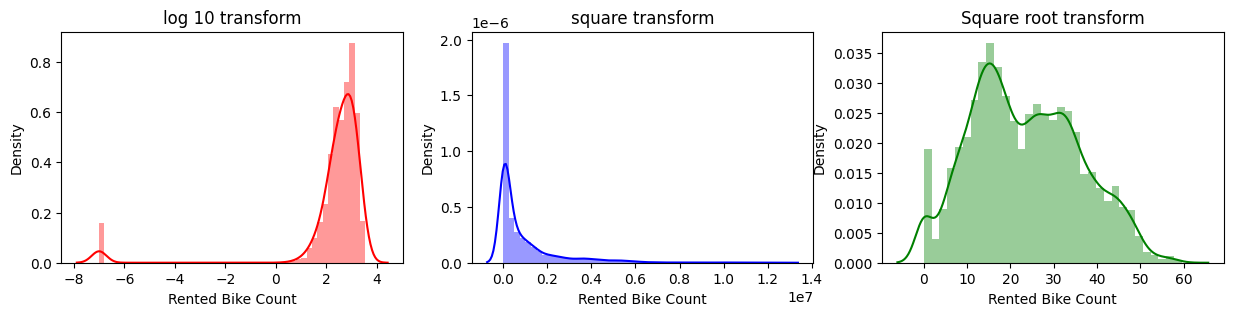

In [125]:
# Transform Your data

fig,axes = plt.subplots(1,3,figsize=(15,3))
axes = axes.flatten()

# Using log10
sns.distplot(np.log10(df_encoded['Rented Bike Count']+0.0000001),ax=axes[0],color='red').set_title("log 10 transform")

# Using square
sns.distplot((df_encoded['Rented Bike Count']**2),ax=axes[1],color='b').set_title("square transform")

# Using square root
sns.distplot(np.sqrt(df_encoded['Rented Bike Count']),ax=axes[2], color='green').set_title("Square root transform")

**Observation:** From the above charts the square root transform gives normal distribution, we use it on the "Rented Bike count" feature while splitting the data for models.

**Data Splitting**

In [126]:
# Split your data to train and test. Choose Splitting ratio wisely.

X = df_encoded.drop(columns=['Rented Bike Count'])
y = np.sqrt(df_encoded['Rented Bike Count'])  #Applying Square Root Transformation on the dependent feature

X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.25,random_state=42)

In [127]:
powert = PowerTransformer()
X_train_powertransformed = powert.fit_transform(X_train)            # fit transform the training set
X_test_powertransformed = powert.transform(X_test)                  #tranform the test set

#shape of train and test data
X_train_powertransformed.shape, X_test_powertransformed.shape, y_train.shape, y_test.shape

((6570, 26), (2190, 26), (6570,), (2190,))

I have used 80% data for train and 20% for test so that the most of the data is used to train and some for test without losing the importance of data.

##**ML Model Implementation**

In [128]:
# Defining the function for metrix calculation

# creating lists for the matrix scores for all models
MSE = []
RMSE = []
MAE = []
R2 = []
Adjusted_R2 = []

# Function to calculate matrix

def metrices(X_test, y_test, y_pred, name):
  plt.figure(figsize=(8,5))
  if name in ['Linear','Ridge','Lasso', 'Decision_Tree','Random_Forest','Gradient_Boosting']:
    mse = mean_squared_error(y_test**2, y_pred**2)                                                                                 # Calculate MSE
    rmse_score = np.sqrt(mse)                                                                                                      # Calculate RMSE
    mae = mean_absolute_error(y_test**2, y_pred**2)                                                                                # Calculate MAE
    r2 = r2_score(y_test**2, y_pred**2)                                                                                            # Calculate R2
    Adj_R2 = (1 - ((1 - r2_score(y_test**2, y_pred**2)) * ((X_test.shape[0] - 1) / (X_test.shape[0] - X_test.shape[1] - 1))))      # Calculate adjusted R2
    print(f"MSE: {mse}\nRMSE: {rmse_score} \nMAE:{mae} \nR2:{r2} \nAdjusted R2:{Adj_R2}")
    plt.plot((y_pred**2)[:100])
    plt.plot((np.array(y_test**2)[:100]))
    plt.legend(["Predicted","Actual"])
    plt.title(f'model: {name}')
  else:                                                                                                                   # scores for tree based models without transformation on dependent variable
    mse = mean_squared_error(y_test, y_pred)                                                                              # Calculate MSE
    rmse_score = np.sqrt(mse)                                                                                             # Calculate RMSE
    mae = mean_absolute_error(y_test, y_pred)                                                                             # Calculate MAE
    r2 = r2_score(y_test, y_pred)                                                                                         # Calculate R2
    Adj_R2 = (1 - ((1 - r2_score(y_test, y_pred)) * ((X_test.shape[0] - 1) / (X_test.shape[0] - X_test.shape[1] - 1))))   # Calculate adjusted R2
    print(f"MSE: {mse}\nRMSE: {rmse_score} \nMAE:{mae} \nR2:{r2} \nAdjusted R2:{Adj_R2}")
    plt.plot((y_pred)[:100])
    plt.plot((np.array(y_test)[:100]))
    plt.legend(["Predicted","Actual"])
    plt.title(f'model: {name} Regression')
  MSE.append(mse)
  RMSE.append(rmse_score)
  MAE.append(mae)
  R2.append(r2)
  Adjusted_R2.append(Adj_R2)
  plt.show()

# creating dictionary to store all the metrices
all_matrices={'Mean_Absolute_error':MAE,'Mean_square_error':MSE,'Root_Mean_square_error':RMSE,'R-Squared':R2,'Adjusted_R-Squared':Adjusted_R2}

###**ML Model 1 - Linear Regression**

Intercept:  23.442819487037085 
 ---------------------------------------------------------------------------------------------------- 
Coefficients:  [ 3.55595383e+00  5.56887879e+00 -1.45288707e+00  2.66960763e-01
  6.72655318e-01  1.27054356e-01 -3.13564359e+00  8.37738229e-02
  1.55233004e-01 -3.62090969e-03 -1.95151614e+00  6.81680257e-01
  5.38416951e+00 -1.67374892e-01 -5.04192691e-01  7.35716608e-02
  6.73188542e-01  1.25033037e+00 -2.44771264e-01 -9.87295236e-01
  6.08060162e-01  1.30189464e+00  8.45813513e-01  2.53170942e-01
 -2.53170942e-01 -6.09749906e-01] 
 ---------------------------------------------------------------------------------------------------- 
Training R2:  0.7088429416252077
MSE: 148820.63919977445
RMSE: 385.7727818285972 
MAE:259.92161498272486 
R2:0.6363140722727058 
Adjusted R2:0.631942442998129


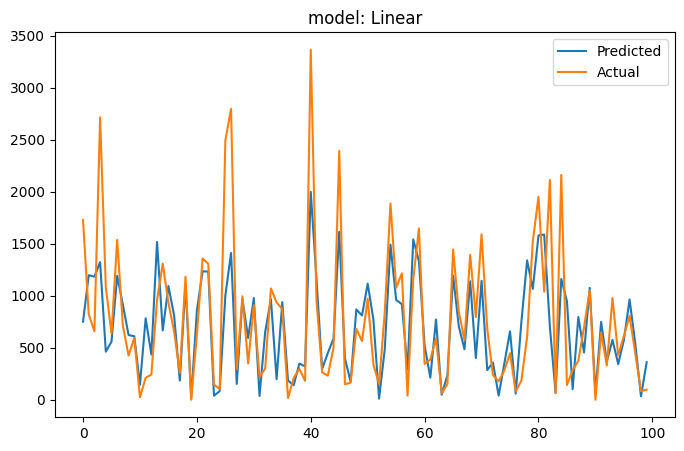

In [129]:
# Fit the Algorithm
model_lr= LinearRegression().fit(X_train_powertransformed, y_train)

#predict the model
y_pred_lr=model_lr.predict(X_test_powertransformed)

#Calculate matrices
print("Intercept: ",model_lr.intercept_, '\n', '-'*100, "\nCoefficients: ", model_lr.coef_, '\n', '-'*100, "\nTraining R2: ", model_lr.score(X_train_powertransformed,y_train))
metrices(X_test_powertransformed, y_test, y_pred_lr, 'Linear')


###**ML Model 2- Lasso Regression**

R2-train: 0.7088429399346254
MSE: 148822.90679040868
RMSE: 385.77572084102013 
MAE:259.92240718878116 
R2:0.6363085307644314 
Adjusted R2:0.6319368348790293


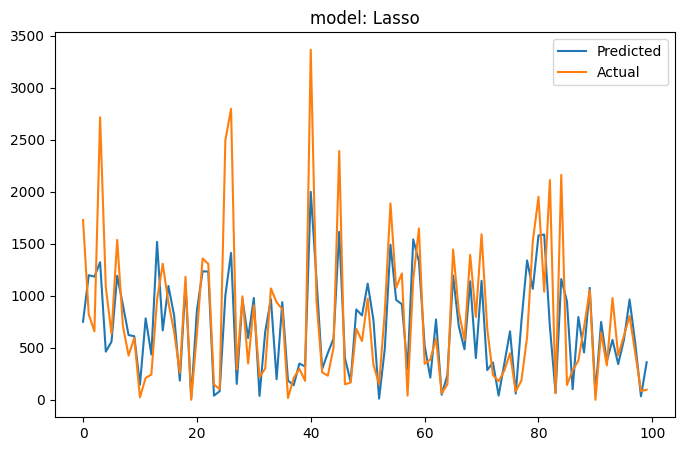

In [130]:
# Fit the Algorithm
lasso = Lasso(alpha=0.0001).fit(X_train_powertransformed, y_train)

# Predict on the model
y_pred_lasso = lasso.predict(X_test_powertransformed)

#Calculate score matrices
print(f"R2-train: {lasso.score(X_train_powertransformed,y_train)}")
metrices(X_test_powertransformed, y_test, y_pred_lasso, 'Lasso')


Explain the ML Model used and it's performance using Evaluation metric Score Chart.

**Model 3 Cross- Validation & Hyperparameter Tuning**

The best fit alpha value: {'alpha': 0.0014} 
Model's best score:  0.6847281247633786 
 ---------------------------------------------------------------------------------------------------- 
R2-train: 0.688098368303877
MSE: 51.40521097286401
RMSE: 7.169742741051732 
MAE:5.396338980961562 
R2:0.6603453855581125 
Adjusted R2:0.6562626208907574


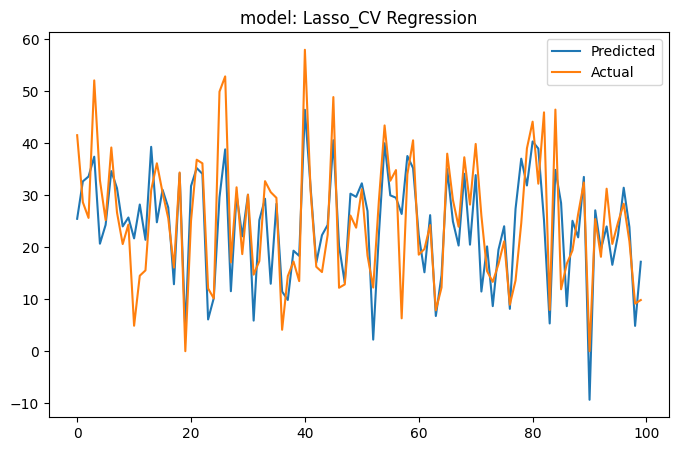

In [131]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
lasso = Lasso()
parameters = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,0.001,0.0011,0.0012,0.0014,0.01,1,5,10,20,30,40,45,50,55,60,100]}
lasso_regressor = GridSearchCV(lasso, parameters, cv=5)

# Fit the Algorithm
lasso_regressor.fit(X_train, y_train)

# Predict on the model
y_pred_lassoCV = lasso_regressor.predict(X_test)

#Calculate metrices

print("The best fit alpha value:" ,lasso_regressor.best_params_, "\nModel's best score: ", lasso_regressor.best_score_,'\n', ('-'*100), '\nR2-train:', lasso_regressor.score(X_train,y_train))
metrices(X_test, y_test, y_pred_lassoCV, 'Lasso_CV')